In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("CW_Data.xlsx")

# 移除索引列
data = data.drop('Index', axis=1)

data

,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,3,3,45.0,21,8,4,2,10.0,0
1,2,3,3,43.0,21,4,2,8,8.0,0
2,1,4,2,26.0,24,0,0,2,0.0,0
3,2,1,3,30.0,24,4,0,0,0.0,2
4,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...
614,2,1,2,55.0,33,6,4,4,8.0,0
615,2,4,2,41.0,27,6,4,4,0.0,0
616,2,1,2,73.0,36,8,8,11,10.0,0
617,2,1,2,77.0,42,8,8,6,10.0,3


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

X = data.drop(['Programme'], axis=1)
y = data['Programme']
X = StandardScaler().fit_transform(X.values)

tsne = TSNE(n_components=2, random_state=42, perplexity=66, learning_rate=50, n_iter=1000, early_exaggeration=70)
X = tsne.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y.values.tolist(), test_size=0.2)

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def Visualization(clf, x_train, x_test, y_train, y_test):
    # Plotting sample scatter plot
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    # Plotting decision boundary, selecting minimum and maximum values
    x_min = x_train[:, 0].min()
    x_max = x_train[:, 0].max()
    y_min = x_train[:, 1].min()
    y_max = x_train[:, 1].max()
    # Generating grid matrix
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    # Calculating the predicted class for each grid point
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    # Reshaping the predicted class to match the grid shape
    Z = Z.reshape(XX.shape)
    # Plotting the decision regions
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
    # Plotting the test set scatter plot
    plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.Paired,
                edgecolor='k', s=10)
    plt.title('Accuracy:{}'.format(clf.score(x_test, y_test)))

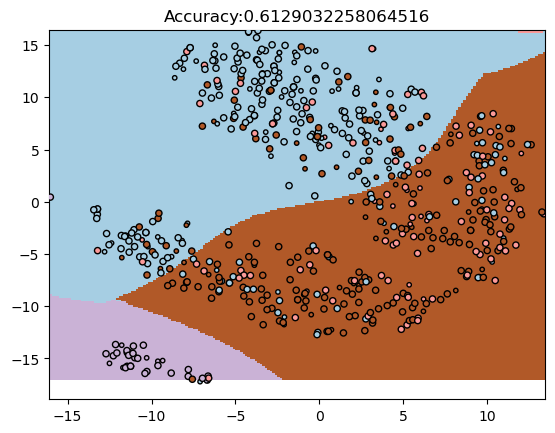

In [106]:
from sklearn import svm
clf_rbf = svm.SVC(kernel='rbf', degree=2, coef0=1, C=5)
clf_rbf.fit(x_train, y_train)
Visualization(clf_rbf, x_train, x_test, y_train, y_test)

In [103]:
# Using a polynomial kernel function for model training, degree: the degree of the polynomial
from sklearn import svm
def best(x_train, y_train, x_test, y_test):
    scores = []  # List to store accuracy scores for different degree values
    # Using a for loop to iteratively select degree values in the range [1,15) for model training and testing evaluation
    for i in range(1, 10):
        clf = svm.SVC(kernel='poly', degree=i, coef0=1, C=5)  # Kernel type is polynomial, selecting different degree values
        clf.fit(x_train, y_train)  # Training using the training set
        score = clf.score(x_test, y_test)  # Evaluating using classification accuracy
        scores.append(score)  # Storing the accuracy score in the list
        print('the accuracy_score is ', score)  # Viewing the score for different degrees
    best_degree = scores.index(np.max(scores)) + 1  # Finding the optimal degree value through the index of the maximum value
    print('the best degree is ', best_degree)  # Viewing the optimal degree value
    return best_degree

best_degree = best(x_train, y_train, x_test, y_test)

the accuracy_score is  0.5887096774193549
the accuracy_score is  0.5967741935483871
the accuracy_score is  0.5887096774193549
the accuracy_score is  0.5887096774193549
the accuracy_score is  0.5887096774193549
the accuracy_score is  0.5887096774193549
the accuracy_score is  0.5887096774193549
the accuracy_score is  0.5967741935483871
the accuracy_score is  0.5806451612903226
the accuracy_score is  0.5806451612903226
the accuracy_score is  0.5725806451612904
the accuracy_score is  0.5725806451612904
the accuracy_score is  0.5483870967741935
the accuracy_score is  0.5161290322580645
the best degree is  2


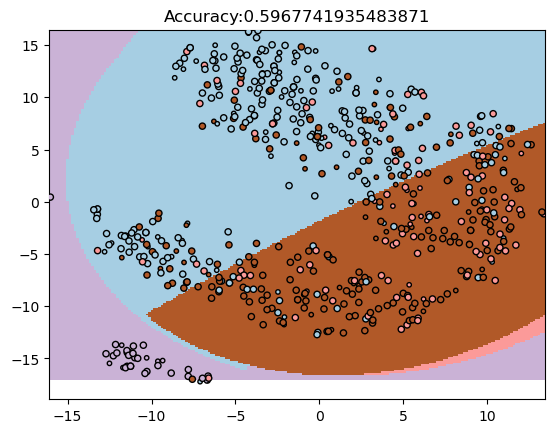

In [94]:
from sklearn import svm
clf_poly = svm.SVC(kernel='poly', degree=2, coef0=1, C=5)
clf_poly.fit(x_train, y_train)
Visualization(clf_poly, x_train, x_test, y_train, y_test)

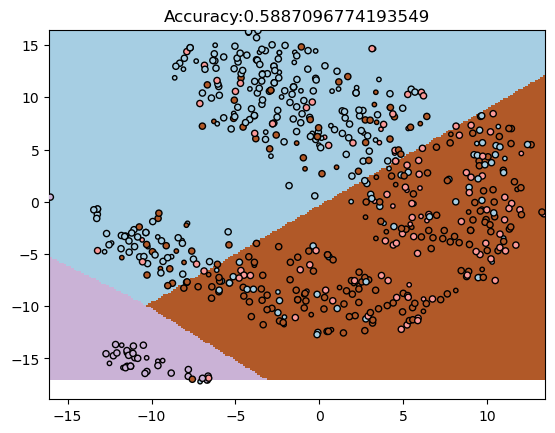

In [95]:
from sklearn import svm
clf_linear = svm.SVC(kernel='linear', C=0.1)
clf_linear.fit(x_train, y_train)
Visualization(clf_linear, x_train, x_test, y_train, y_test)

In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)
print(accuracy_score(y_test, y_pred_tree))

0.6451612903225806
0.6209677419354839


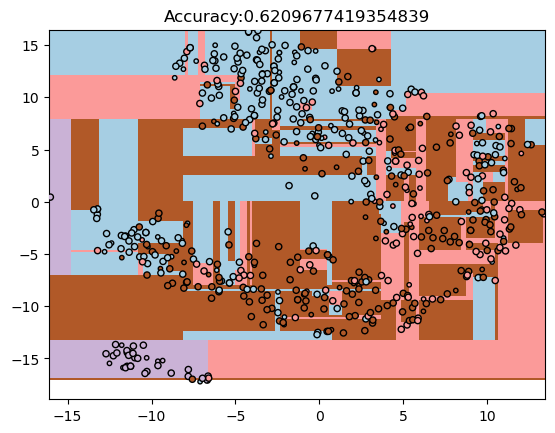

In [97]:
Visualization(tree_clf, x_train, x_test, y_train, y_test)

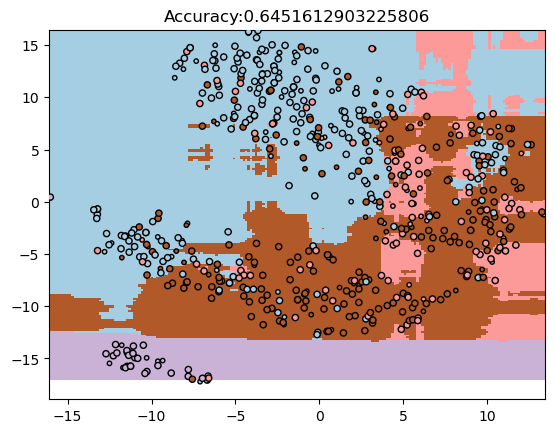

In [98]:
Visualization(bag_clf, x_train, x_test, y_train, y_test)

In [99]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

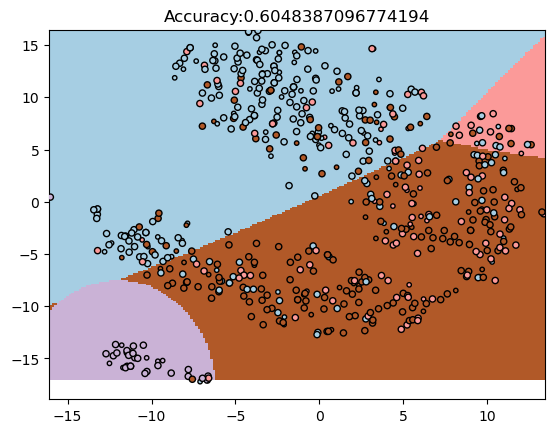

In [100]:
Visualization(gnb, x_train, x_test, y_train, y_test)

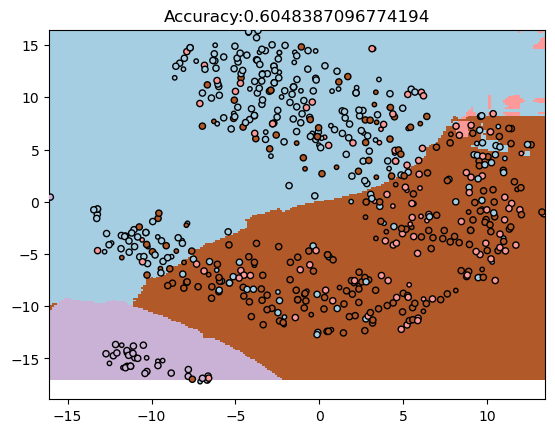

In [102]:
from sklearn.ensemble import VotingClassifier
classifier1 = clf_rbf
classifier2 = bag_clf
classifier3 = gnb

estimators = [('classifier1', classifier1), ('classifier2', classifier2), ('classifier3', classifier3)]
voting = VotingClassifier(estimators, voting='hard')

voting.fit(x_train, y_train)
Visualization(voting, x_train, x_test, y_train, y_test)